## Exercise 1

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras 
import tensorflow_addons as tfa #for tfa to work, a compatible version of tensorflow has to be installed: check https://github.com/tensorflow/addons
import numpy as np
import matplotlib.pyplot as plt
import os

#to make this notebook’s output stable across runs
np.random.seed(42) 
tf.random.set_seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() 
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid , X_train = X_train_full [:5000] , X_train_full [5000:]
y_valid , y_train = y_train_full [:5000] , y_train_full [5000:]
X_test = X_test.astype(np.float32) / 255.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#define sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

#define optimizers used in different layers of the model
#legacy used to run more efficient on M1/M2 Macs as suggested by warning
#WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.SGD` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.SGD`.
optimizers = [
    tf.keras.optimizers.legacy.SGD(learning_rate=1e-4), #lower optimizer -> close to input
    tf.keras.optimizers.legacy.Adam(learning_rate=1e-2) #lower optimizer -> close to output
]

#assign optimizers to the layers
optimizers_and_layers = [(optimizers[0], model.layers[0]), (optimizers[1], model.layers[1:])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

#compile with .SparseCategoricalCrossentropy as loss funciton and accuracy as metric (will be later be outputted for every epoch)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
#fit the model, default batch size is 32, see https://keras.io/api/models/model_training_apis/
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1719/1719 [==============================] - 9s 5ms/step - loss: 0.5275 - accuracy: 0.8097 - val_loss: 0.4674 - val_accuracy: 0.8426
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4360 - accuracy: 0.8444 - val_loss: 0.5070 - val_accuracy: 0.8270
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4141 - accuracy: 0.8512 - val_loss: 0.3880 - val_accuracy: 0.8716
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3979 - accuracy: 0.8568 - val_loss: 0.4237 - val_accuracy: 0.8634
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3954 - accuracy: 0.8581 - val_loss: 0.4104 - val_accuracy: 0.8566


In [ ]:
#check accuracy of model on the test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4473 - accuracy: 0.8447 - 618ms/epoch - 2ms/step

Test accuracy: 0.8446999788284302


In [ ]:
#functions to plot the predictions from lecture exercise

#use classnames from lecture example
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img, label):
  true_label, img = label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]))
                   
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  


1/1 [==============================] - 0s 307ms/step


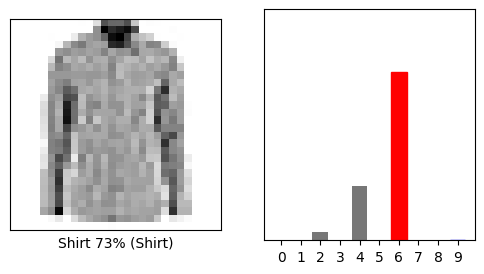

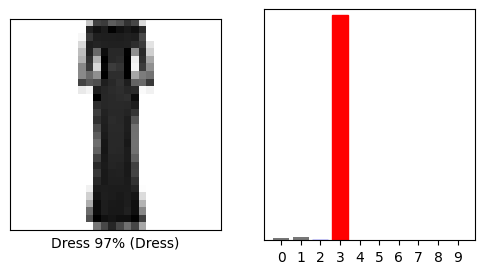

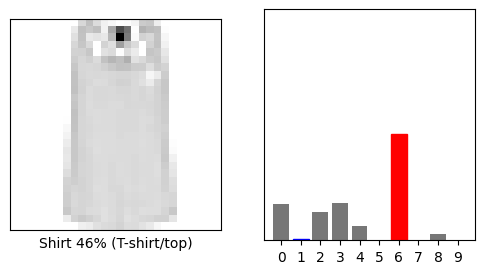

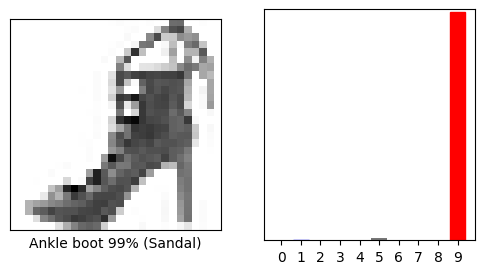

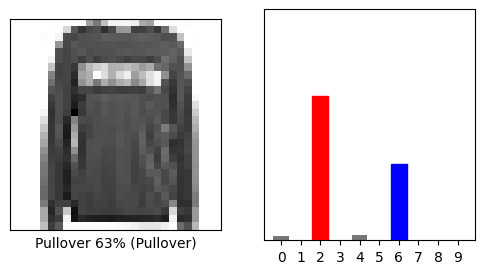

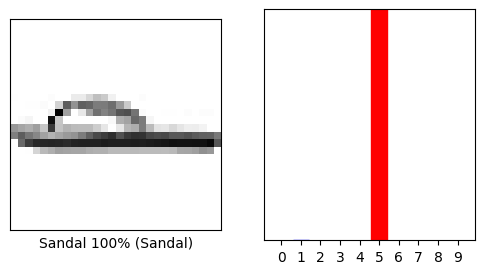

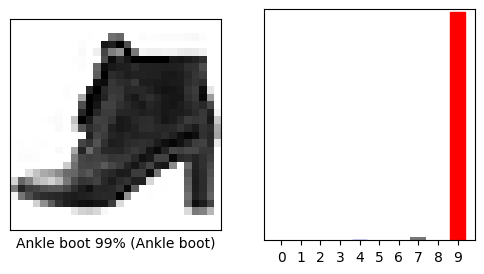

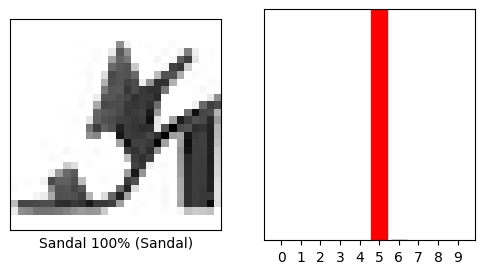

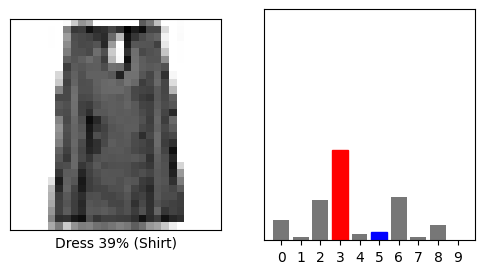

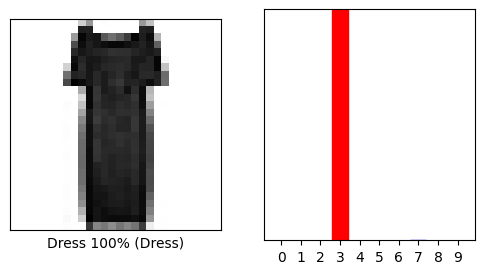

In [ ]:
import numpy as np
#make predictions
import matplotlib.pyplot as plt


# Randomly choose 10 indexes from X_test
num_images = 10
indexes = np.random.choice(len(X_test), size=num_images, replace=False)
test_images = X_test[indexes]
label = y_test[indexes]
pred = model.predict(test_images)

for i in range(num_images):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, pred[i], y_test, test_images, label)
    plt.subplot(1,2,2)
    plot_value_array(i, pred[i],  y_test)
    plt.show()

## Exercise 2

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
from keras.optimizers import Adam


[nltk_data] Downloading package punkt to /Users/jonathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
fake = pd.read_csv('Fake.csv')
fake.head()
#fake.isna().sum()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = pd.read_csv('True.csv')
true.head()
#true.isna().sum()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#function to remove stopwords and tokenization
def text_preprocessing_alt(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    new_text = []
    #ps = PorterStemmer()

    for w in tokens:
        if w not in stopwords.words('english') and len(w) > 2:
            #stem_token = ps.stem(w)   
            new_text.append(w)  # Add the stemmed word to new_tokens
    
    text_prep = ' '.join(new_text)  # Join stemmed tokens into a string
    return text_prep


##new
stop_words = set(stopwords.words('english'))

def text_preprocessing(text):
    text = text.lower()
    tokens = word_tokenize(text)

    new_text = []
    # ps = PorterStemmer()

    for w in tokens:
        if w not in stop_words and len(w) > 2:
            # stem_token = ps.stem(w)
            new_text.append(w)  # Add the stemmed word to new_tokens

    text_prep = ' '.join(new_text)  # Join stemmed tokens into a string
    return text_prep

In [9]:
#pre process text 
fake['text'] = fake['text'].apply(text_preprocessing)
true['text'] = true['text'].apply(text_preprocessing)

# Preprocess in chunks
chunk_size = 1000
for i in range(0, len(fake), chunk_size):
    fake.loc[i:i+chunk_size, 'text'] = fake.loc[i:i+chunk_size, 'text'].apply(text_preprocessing)

for i in range(0, len(true), chunk_size):
    true.loc[i:i+chunk_size, 'text'] = true.loc[i:i+chunk_size, 'text'].apply(text_preprocessing)


In [1]:
#labeling of data in new column
fake['true'] = 0
true['true'] = 1
data = pd.concat([fake, true], axis=0)
data.tail()

NameError: name 'fake' is not defined

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding  # Import Embedding layer
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords


X = data['text']
y = data['true']

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_len = max(len(seq) for seq in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model.add(Bidirectional(LSTM(units=64, activation='relu')))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Model Accuracy:", accuracy)

Epoch 1/2


Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x168cbdda0>
Traceback (most recent call last):
  File "/Users/mauricebaier/anaconda3/lib/python3.11/site-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
           ^^^^^^^^^^^
  File "/Users/mauricebaier/anaconda3/lib/python3.11/site-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
           ^^^^^^^^^^^
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


449/449 ━━━━━━━━━━━━━━━━━━━━ 2415s 5s/step - accuracy: 0.5354 - loss: nan - val_accuracy: 0.5267 - val_loss: nan
Epoch 2/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 2800s 6s/step - accuracy: 0.5273 - loss: nan - val_accuracy: 0.5267 - val_loss: nan
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 492ms/step - accuracy: 0.5189 - loss: nan
Model Accuracy: 0.5270601511001587
